In [1]:
# nhập thư viện
import numpy as np
import pandas as pd

In [2]:
# tạo hàm lấy dữ liệu
def loadCsv(filename) -> pd.DataFrame:
    '''Code here'''

In [3]:
# tạo hàm chia dữ liệu thành train và test, tạo X_train/y_train và X_test/y_test.
def splitTrainTest(data, ratio_test):
    np.random.seed(28) # không thay đổi mỗi lần chạy
    index_permu = np.random.permutation(len(data)) # xáo trộn index 
    data_permu = data.iloc[index_permu] # lấy lại dữ liệu tương ứng với index xáo trộn
    len_test = int(len(data_permu)*ratio_test) # kích cỡ tập test
    test_set = data_permu.iloc[: len_test, :] # tập test lấy phần đầu
    train_set = data_permu.iloc[len_test: , :]  # tập train lấy phần còn lại
    # Chia tập dữ liệu thành (x_train, y_train: Lấy tất cả cột trừ dòng cuối), (x_test, y_test: Chỉ lấy cột cuối)
    '''Code here'''
    return X_train, y_train, X_test, y_test

In [4]:
# hàm lấy tần số của từ: 1. lấy túi từ (bag words), 2. lấy tần số từ
def get_words_frequency(data_X):  # tạo hàm lấy tần số từ, data_X --> DataFrame
    bag_words = np.concatenate([i[0].split(' ') for i in data_X.values], axis = None)
    # B1: lấy các giá trị của DataFrame --> Array
    # B2: lặp qua các phần tử trong mảng chính là i --> string (text)
    # B3: lấy các từ trong đoạn text ra --> [['VKE', 'đánh', 'CKTG', 'vậy', 'là', 'hay', 'rồi'], ['Đã', 'quá', 'VKE', 'ơi']]
    # B4: hàm concatenate với tham số axis = None có chức năng làm phẳng và đưa về mảng một chiều
    # --> array['VKE', 'đánh', 'vậy', 'là', 'hay', 'rồi', 'Đã', 'quá', 'VKE', 'ơi']
    
    bag_words = np.unique(bag_words) # loại bỏ các giá trị trùng và lấy giá trị duy nhất trong mảng bag_words
    matrix_freq = np.zeros((len(data_X), len(bag_words)), dtype = int) # tạo ma trận 0 có kích cỡ [số dòng data_X(dòng) x số từ trong túi từ(cột)]

    word_freq = pd.DataFrame(matrix_freq, columns = bag_words) # tạo frame với matrix_freq, cột là các từ trong túi từ 
    for id, text in enumerate(X_train.values.reshape(-1)):
    # hàm enumerate sẽ gán index cho mỗi phần từ, có tham số start để có thể điều chỉnh số bắt đầu
    # index lưu vào id, phần tử lưu vào text
        for j in bag_words: # đối với mỗi id (dòng), ta lặp qua các từ trong túi (cột)
            word_freq.at[id, j] = text.split(' ').count(j) # đếm từ đó có trong biến text và gán tại vị trí [id, j]
    return word_freq, bag_words # trả lại biến tần số từ, --> DataFrame(cột là các từ trong túi từ)

In [5]:
def transform(data_test, bags): # bags là bag_words được return từ hàm get_words_frequency, data_test dạng frame
    matrix_0 = np.zeros((len(data_test), len(bags)), dtype = int)
    frame_0 = pd.DataFrame(matrix_0, columns = bags)
    for id, text in enumerate(data_test.values.reshape(-1)):
        print(text)
        for j in bags:
            frame_0.at[id, j] = text.split(' ').count(j)
    return frame_0

In [6]:
# trước khi tính khoảng cách thì đổi tập test sang số.

In [7]:
# tạo hàm tính khoảng cách: Euclid, Manhattan, Cosine
# khoảng cách Cosine: đưa data_X về Array để tính không còn DataFrame

# Bên trên X_train và X_test ở dạng DataFrame, ta phải cho đi qua hàm lấy tần số từ, kết quả trả về vẫn là DataFrame có giá trị là các số
# Chuyển DataFrame này về dạng mảng trước khi đưa vào hàm tính khoảng cách dùng values --> mảng nhiều chiều 
def cosine_distance(train_X_number_arr, test_X_number_arr): 
    dict_kq = dict() # tạo dictionary trống
    for id, arr_test in enumerate(test_X_number_arr, start = 1):
    # tương tự lấy index cho mỗi phần tử trong mảng test_X_number_arr, index đánh bắt đầu bằng 1
        
        q_i = np.sqrt(sum(arr_test**2)) # căn của tổng ([q_i]^2), dùng để tính mẫu
        for j in train_X_number_arr:
            _tu = sum(j*arr_test) # tính tử: tổng q[i]*dj[i]

            # tính mẫu: (căn của tổng (q[i]^2)*(căn của tổng (dj[i])^2)
            d_j = np.sqrt(sum(j**2))
            _mau = d_j*q_i

            # kết quả: lấy tử chia mẫu --> khoảng cách của mỗi dòng trong test_X với các dòng trong train_X
            kq = _tu/_mau 
            
            # nếu index có trong dict_kq rồi thì ta thêm giá trị kq vào, nếu chưa thì ta tạo khoá id với giá trị kq.
            if id in dict_kq:
                dict_kq[id].append(kq)
            else:
                dict_kq[id] = [kq]
    
    return dict_kq # --> Dictionary với key: dòng trong tập test, value: các giá trị đã được tính khoảng cách với các dòng trong tập train
    # ví dụ: {1: [2, 3, 4, 5, 6]}, 1 là dòng thứ nhất trong tập test, [2, 3, 4, 5, 6] là khoảng cách của dòng 1 trong tập test đến các dòng trong tập train

In [8]:
# lớp KNN
class KNNText:
    # hàm tạo
    def __init__(self, k): # k là số điểm dữ liệu gần nhất
        '''Code here'''
    # hàm fit
    def fit(self, X_train, y_train):
        '''Code here'''
       
    # hàm predict
    # tương tự như X_train, X_test cũng phải lấy tần số từ rồi chuyển về mảng trước khi đưa vào dự đoán
    def predict(self, X_test):
        self.X_test = X_test

        _distance = cosine_distance(self.X_train, self.X_test) # tính khoảng cách tất cả các dòng trong tập test với tập train --> dict 
        
        
        
        # reset index y_train bắt đầu từ 1 - 15
        self.y_train.index = range(len(self.y_train))
        
        _distance_frame = pd.concat([pd.DataFrame(_distance), pd.DataFrame(self.y_train)], axis = 1)
        
        # B1: tạo frame với _distance và tạo frame với y_train (ban đầu ở dạng Series, tạo tên cột là target)
        # B2: hàm concat nối hai frame này lại với nhau (nối theo cột nên axis = 1)
        
        target_predict = dict() # tạo dict trống
        for i in range(1, len(self.X_test) + 1): # lặp qua các dòng trong X_test thông qua index, bắt đầu từ 1 vì ở trong hàm khoảng cách ta bắt đầu từ 1
            # lấy frame con chỉ hai cột i và target rồi sắp xếp cột i tăng dần, sau đó lấy k hàng đầu
            '''Code here'''
            
            # đếm tần số giá trị trong cột target rồi lấy phần tử có tần số cao nhất gán cho phần tử của X_test 
            '''Code here'''
            
            # thêm key và giá trị gán tương ứng vào target_predict, Ví dụ: {1: [True], 2: [False]} 
            '''Code here'''
            
        return target_predict # trả lại dict đã dự đoán
    # tạo hàm score
    def score(self):
        pass
        

In [9]:
### Demo bằng Education

In [10]:
data = loadCsv('Education.csv')
# loại bỏ các kí tự đặc biệt
data['Text'] = data['Text'].apply(lambda x: x.replace(',', ''))
data['Text'] = data['Text'].apply(lambda x: x.replace('.', ''))
data['Text'][1]

'Critics argue that recent improvements in the school system are merely superficial'

In [11]:
X_train, y_train, X_test, y_test = splitTrainTest(data, 0.25)
print(len(X_train))
print(len(X_test))

39
13


In [12]:
words_train_fre, bags = get_words_frequency(X_train)
print(bags)
print(len(bags))
print(words_train_fre)

['Budget' 'Charter' 'Critical' 'Critics' 'Despite' 'Education'
 'Educational' 'Higher' 'Online' 'Parental' 'Project-based' 'Public'
 'School' 'Standardized' 'Teacher' 'The' 'Underfunded' 'a' 'academic'
 'access' 'accommodate' 'accountability' 'achievement' 'address'
 'adequate' 'adequately' 'aim' 'also' 'alternatives' 'among' 'and'
 'anxiety' 'are' 'argue' 'aspirations' 'awareness' 'backgrounds' 'based'
 'be' 'become' 'best' 'budget' 'but' 'by' 'can' 'citizenship' 'class'
 'classroom' 'classrooms' 'collaboration' 'communities' 'complex'
 'connections' 'constraints' 'contentious' 'create' 'creativity'
 'critical' 'crucial' 'cultural' 'curricula' 'curriculum' 'cuts' 'debate'
 'debated' 'decreased' 'despite' 'different' 'disparities' 'diverse'
 'divert' 'drain' 'education' 'educational' 'educators' 'effectiveness'
 'efforts' 'emphasize' 'empower' 'encourages' 'engagement' 'ensure'
 'equity' 'essential' 'evaluation' 'evaluations' 'exacerbate' 'excellence'
 'extensive' 'fail' 'favoring' 'fe

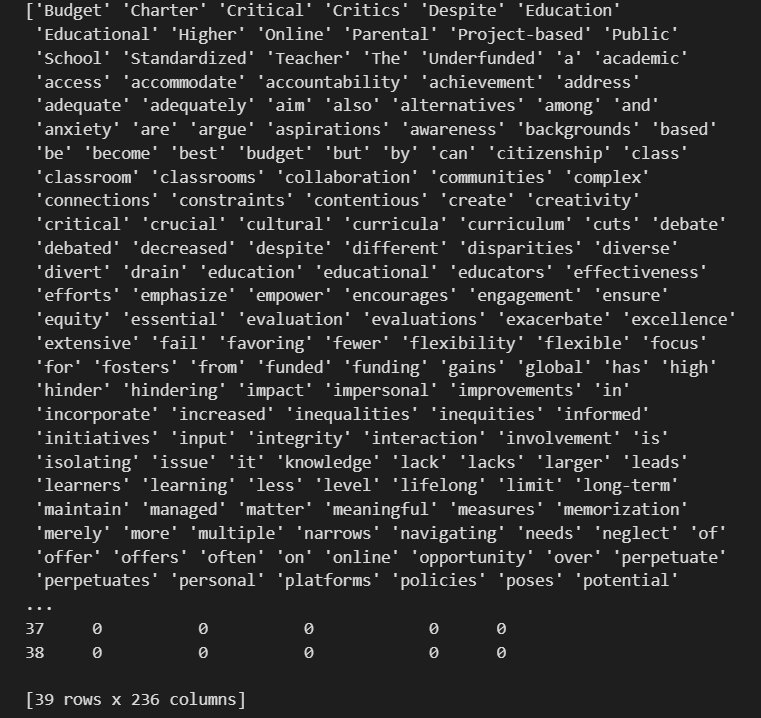

In [13]:
words_train_fre

,Budget,Charter,Critical,Critics,Despite,Education,Educational,Higher,Online,Parental,...,time,to,today's,traditional,training,true,uncertain,undermine,unnecessary,world
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


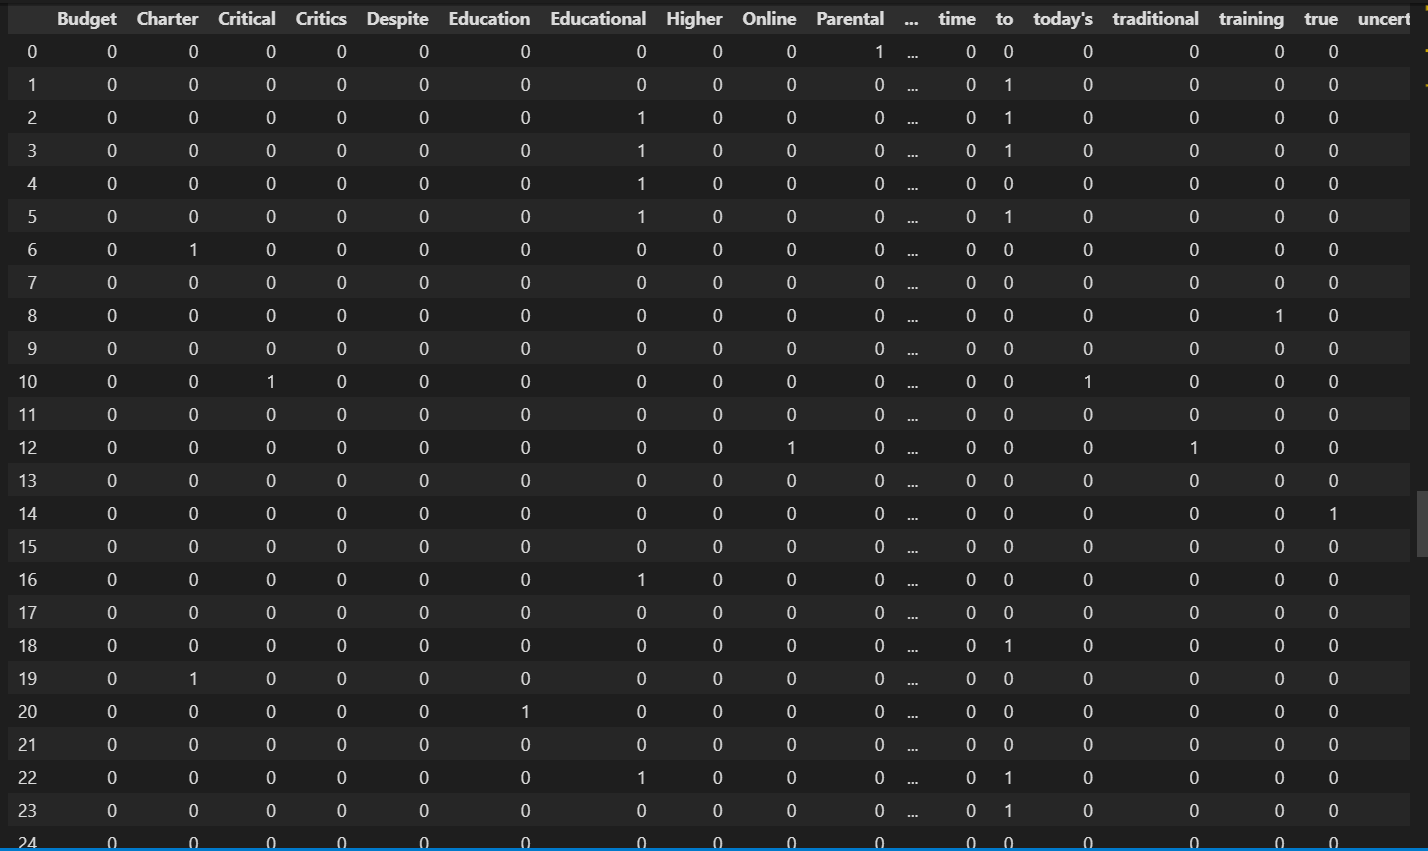

In [14]:
words_test_fre = transform(X_test, bags)

Special education programs strive to support diverse learners but funding often falls short
Privatization of education leads to disparities in access and quality
The emphasis on testing leads to a narrow focus on exam preparation at the expense of holistic learning
Access to quality education should be a universal right not a privilege
Teacher diversity is important for promoting inclusivity and cultural competence
Educational inequities persist despite efforts to bridge the gap
Educators should receive more support and recognition for their crucial role in society
Innovative teaching methods have led to unexpected challenges for both students and teachers
Early childhood education lays the foundation for lifelong learning yet it faces funding challenges
Resource allocation in schools often favors affluent communities over marginalized ones
Standardized testing perpetuates a culture of competition rather than collaboration
Standardized tests fail to capture the full range of students' 

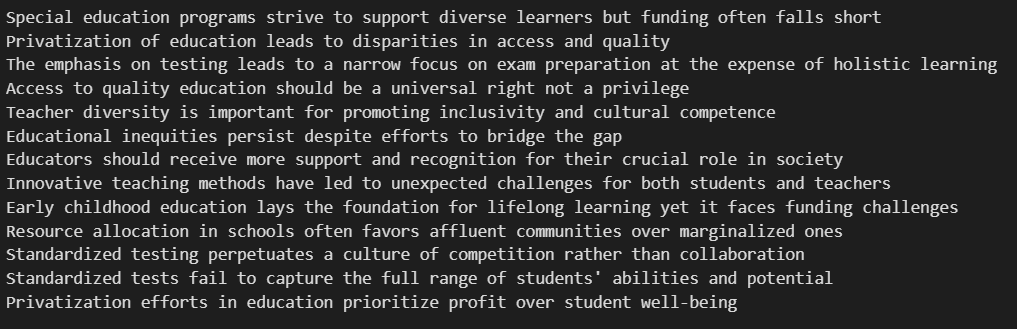

In [15]:
words_test_fre

,Budget,Charter,Critical,Critics,Despite,Education,Educational,Higher,Online,Parental,...,time,to,today's,traditional,training,true,uncertain,undermine,unnecessary,world
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


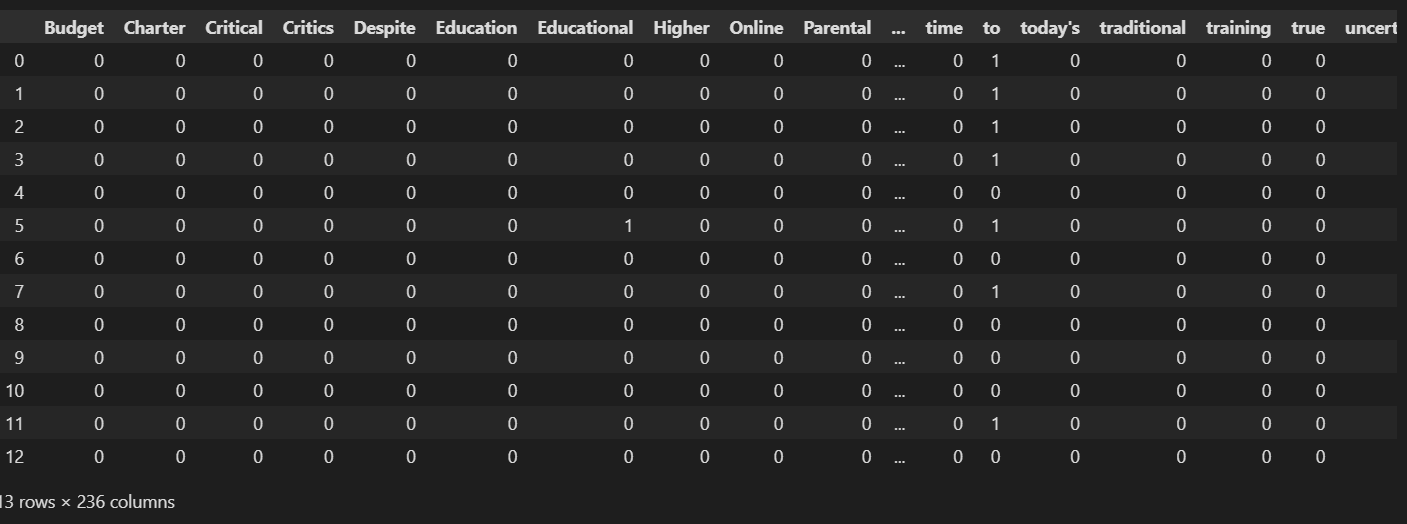

In [16]:
knn = KNNText(k = 2)

In [17]:
knn.fit(words_train_fre.values, y_train)

In [18]:
pred_ =  pd.DataFrame(pd.DataFrame(knn.predict(words_test_fre.values)).values.reshape(-1), columns = ['Predict'])
pred_.index = range(1, len(pred_) + 1)

In [19]:
y_test.index = range(1, len(y_test)+ 1)
y_test = y_test.to_frame(name = 'Actual')

In [20]:
pd.concat([pred_, y_test], axis = 1)

,Predict,Actual
1,positive,positive
2,negative,negative
3,positive,negative
4,positive,positive
5,negative,positive
6,positive,negative
7,positive,positive
8,negative,positive
9,positive,positive
10,positive,negative


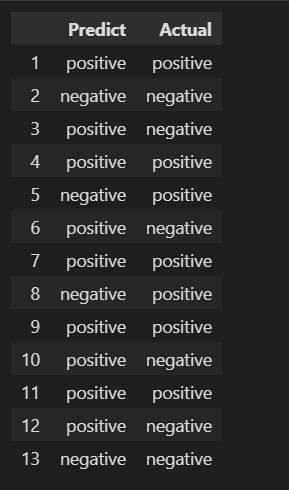